In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import datetime
import math
import time
import seaborn as sns 
from scipy.stats import norm 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [18]:
datas=pd.read_csv('car-data.csv')
datas.shape

(301, 9)

In [19]:
datas=datas[['Present_Price','Selling_Price','Kms_Driven']] 
datas.head()

,Present_Price,Selling_Price,Kms_Driven
0,5.59,3.35,27000
1,9.54,4.75,43000
2,9.85,7.25,6900
3,4.15,2.85,5200
4,6.87,4.60,42450


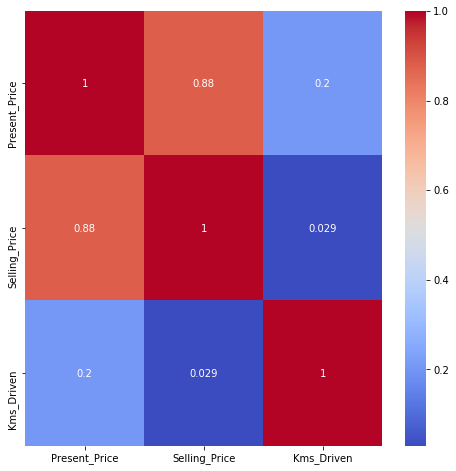

In [4]:
plt.figure(figsize=(8,8))
sns.heatmap(datas.corr(), annot=True, cmap='coolwarm')

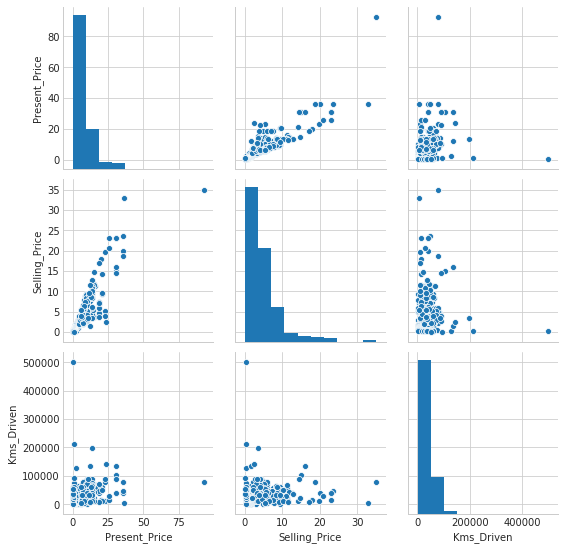

In [6]:
from matplotlib import style
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.pairplot(datas)
plt.savefig('pairplot.png')

In [7]:
#cleaning data
datas.loc[datas['Present_Price']>75].head()
datas=datas.drop(86,axis=0)

In [8]:
Y = datas['Present_Price']  
X = datas['Selling_Price'] 
X=X.fillna(0) #which solves the nan problem
Y=Y.fillna(0)

In [9]:
x = X.to_numpy() #X are in pandas series, converting to numpy array
y = Y.to_numpy()
x = x.reshape(-1,1) #convert to 2d array for lin.fit()
y = y.reshape(-1,1)

In [10]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 

lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

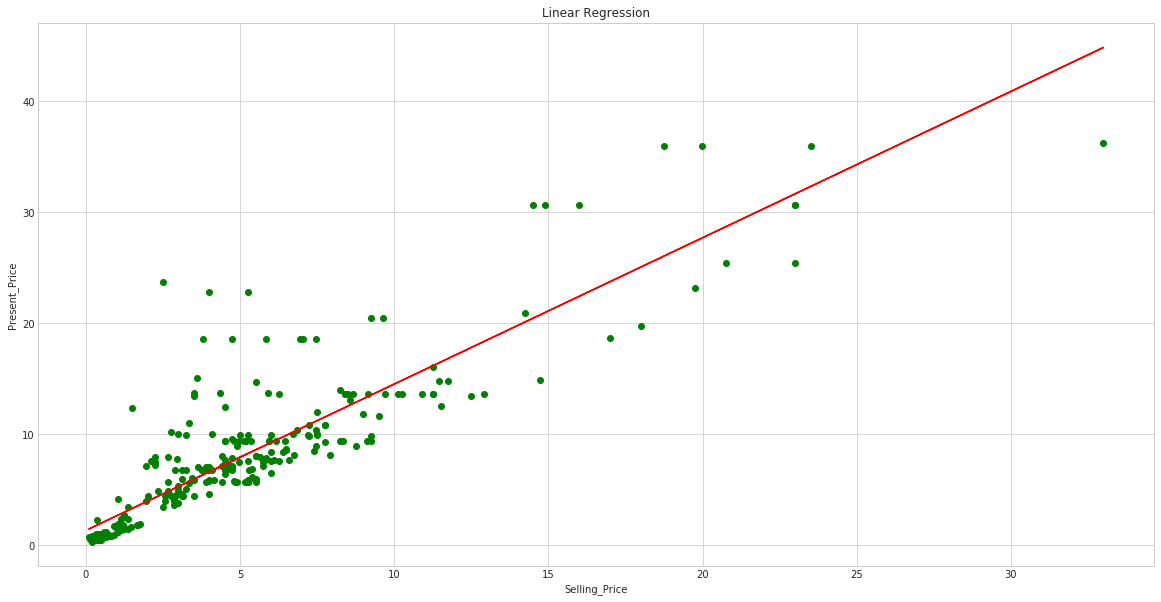

In [16]:
#visualizing the linear regression
plt.scatter(x, y, color = 'green') #original plot
plt.plot(x, lin.predict(x), color = 'red') #predicted plot
plt.title('Linear Regression') 
plt.xlabel('Selling_Price') 
plt.ylabel('Present_Price') 

plt.show()

In [12]:
#putting 80% for training and 20% as test
X_train, X_test, y_train, y_test = train_test_split( datas[['Present_Price','Kms_Driven']],datas['Selling_Price'] , test_size=0.2, random_state=90)
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
pred = reg.predict(X_test)
pred

array([ 8.47199941,  0.85800101,  0.90220418,  0.97072775,  5.33846963,
        0.72261464,  9.08009039,  0.42954277,  4.52076902,  1.42411241,
        8.52025128,  4.17758835,  5.04601083,  2.02947652,  4.39859077,
        2.29470074,  2.83576376,  3.72220286,  5.1150737 ,  0.60265111,
        0.1727676 , 18.40570044, -0.30309808,  0.78648462, 11.09610009,
        0.85530506,  1.04302428,  4.34435871,  5.76569401,  4.35043437,
        5.44279026,  0.65367645,  4.37292455,  6.70231135,  0.72944908,
        5.75248452, -0.05702303,  2.67006531,  5.66400044,  3.98176353,
        2.98764898,  5.04351377, 12.51667979,  7.97250964,  7.98484487,
        6.01453088,  2.87672224,  4.93414641,  3.59548706,  0.3705055 ,
        6.67385178,  7.91402269,  1.05922728,  0.71141848,  1.04707785,
       13.00961903,  5.89463396,  0.76161957,  3.4279044 ,  0.67895611])

In [15]:
#checking accuracy
import sklearn
print("Mean absolute error =", sklearn.metrics.mean_absolute_error(y_test, pred)) 
print("Mean squared error =", sklearn.metrics.mean_squared_error(y_test,pred)) 
print("Median absolute error =", sklearn.metrics.median_absolute_error(y_test,pred)) 
print("Explain variance score =", sklearn.metrics.explained_variance_score(y_test, pred)) 
print("R2 score =", sklearn.metrics.r2_score(y_test, pred))


Mean absolute error = 1.1772409175676029
Mean squared error = 4.18029333185032
Median absolute error = 0.651930617717583
Explain variance score = 0.6421932385691709
R2 score = 0.6380819044643447
